<a href="https://colab.research.google.com/github/Thiago-NovaesB/MestradoPuc.jl/blob/main/ComputacaoEvolucionaria/Exerc%C3%ADcio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lista 4

In [ ]:
# https://deap.readthedocs.io/en/master/
# instalar pacote deap
!pip install deap
import numpy as np
import random
import sys
import matplotlib.pyplot as plt
from deap import creator, tools, base, algorithms

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 3.3 MB/s eta 0:00:00


## Questão 1

In [ ]:
# dados de entrada
x = np.array([-1.0, -0.7, -0.4, -0.1, 0.2, 0.5, 0.8, 1.0])
y = np.array([36.547, 17.264, 8.155, 3.852, 1.820, 0.860, 0.406, 0.246])

In [ ]:
# função objetivo
def objective_function(individual):
  a = individual[0]
  b = individual[1]
  z = a*np.e**(b*x)
  return np.linalg.norm(z-y),

In [ ]:
# Tipos da fitness e indivíduos
creator.create('FitnessMin', base.Fitness, weights=(-1.0,))
creator.create('Individual', list, fitness=creator.FitnessMin)

In [ ]:
toolbox = base.Toolbox()

# gerador da variável de decisão
toolbox.register('attr_real', random.gauss, 0, 10)

# Inicializar individuo e população
# initRepeat(container, func, n)
toolbox.register('individual', tools.initRepeat, creator.Individual, toolbox.attr_real, 2)  

# População
toolbox.register('population', tools.initRepeat, list, toolbox.individual)

In [ ]:
# Operadores
toolbox.register('evaluate', objective_function)
toolbox.register('mate', tools.cxBlend, alpha=0)
toolbox.register('mutate', tools.mutGaussian, mu=0, sigma=1, indpb=0.05)
toolbox.register('select', tools.selTournament, tournsize=3)

In [ ]:
pop = toolbox.population(n=100)
hof = tools.HallOfFame(1)  # melhor de todo o processo
stats = tools.Statistics(lambda ind:ind.fitness.values)
stats.register('avg', np.mean)
stats.register('std', np.std)
stats.register('min', np.min)
stats.register('max', np.max)

In [ ]:
pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.1, ngen=50, 
                                stats=stats, halloffame=hof, verbose=True)

gen	nevals	avg        	std        	min    	max        
0  	100   	8.19534e+09	8.03553e+10	11.3321	8.07679e+11
1  	51    	21706.4    	83085.7    	11.3321	613972     
2  	57    	47.0063    	35.6401    	10.3846	211.959    
3  	49    	29.29      	22.3291    	7.16942	182.679    
4  	61    	17.0018    	7.68529    	5.5176 	41.2647    
5  	58    	11.8562    	5.42969    	3.82762	49.1388    
6  	45    	9.01371    	3.05252    	3.82762	30.3653    
7  	64    	6.96583    	1.76394    	4.70539	15.1678    
8  	57    	5.85321    	1.84054    	4.70539	23.623     
9  	51    	5.59602    	2.14764    	4.70539	26.9139    
10 	47    	5.27107    	0.0987781  	4.70539	5.56891    
11 	65    	5.18435    	0.122779   	4.70539	5.39965    
12 	50    	5.40683    	2.04246    	4.68772	24.789     
13 	56    	4.99599    	0.184529   	4.68772	5.23065    
14 	62    	4.95665    	1.06913    	4.65784	15.4924    
15 	56    	4.72805    	0.0721683  	4.57508	5.05119    
16 	51    	4.67243    	0.0378413  	4.55682	4.73151    
17 	50    

In [ ]:
# Melhor solução
print('Melhor indivíduo:', hof[0])

Melhor indivíduo: [4.531925973330648, -2.0682364106873092]


In [ ]:
# Resultado da fo do mlehor indivíduo:
print('Melhor F.O.:', objective_function(hof[0]))

Melhor F.O.: (3.827621821321985,)


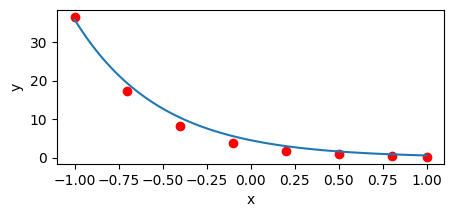

In [ ]:
X = np.linspace(-1,1,100)
plt.figure(figsize=(5,2))
plt.plot(X, hof[0][0]*np.e**(hof[0][1]*X))
plt.scatter(x, y, color='red')  # melhor
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Questão 2

In [ ]:
# função objetivo
def objective_function(individual):
  return 3*individual[0]+5*individual[1],

def feasible(individual):
  if individual[0] > 4:
    return False
  if individual[1] > 6:
    return False
  if individual[0] < 0:
    return False
  if individual[1] < 0:
    return False
  if 3*individual[0] + 2*individual[1] > 18:
    return False
  return True

def distance(individual):
  value = 0
  if individual[0] > 4:
    value += individual[0] - 4
  if individual[1] > 6:
    value += individual[1] - 6
  if individual[0] < 0:
    value += -individual[0]
  if individual[1] < 0:
    value += -individual[1]
  if 3*individual[0] + 2*individual[1] > 18:
    value += 3*individual[0] + 2*individual[1] - 18
  return value

In [ ]:
# Tipos da fitness e indivíduos
creator.create('FitnessMax', base.Fitness, weights=(1.0,))
creator.create('Individual', list, fitness=creator.FitnessMax)

/usr/local/lib/python3.9/dist-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.9/dist-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [ ]:
toolbox = base.Toolbox()

# gerador da variável de decisão
toolbox.register('attr_real1', random.uniform, 0, 4)
toolbox.register('attr_real2', random.uniform, 0, 6)

# Inicializar individuo e população
toolbox.register('individual', tools.initCycle, creator.Individual, (toolbox.attr_real1, toolbox.attr_real2), 1)  

# População
toolbox.register('population', tools.initRepeat, list, toolbox.individual)

In [ ]:
# Operadores
toolbox.register('evaluate', objective_function)
toolbox.decorate("evaluate", tools.DeltaPenalty(feasible, 100, distance))
toolbox.register('mate', tools.cxBlend, alpha=0)
toolbox.register('mutate', tools.mutGaussian, mu=0, sigma=1, indpb=0.05)
toolbox.register('select', tools.selTournament, tournsize=3)

In [ ]:
pop = toolbox.population(n=100)
hof = tools.HallOfFame(1)  # melhor de todo o processo
stats = tools.Statistics(lambda ind:ind.fitness.values)
stats.register('avg', np.mean)
stats.register('std', np.std)
stats.register('min', np.min)
stats.register('max', np.max)

In [ ]:
pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.1, ngen=50, 
                                stats=stats, halloffame=hof, verbose=True)

gen	nevals	avg    	std    	min    	max    
0  	100   	26.3749	25.4107	1.27811	99.9948
1  	56    	43.1345	30.9808	9.51499	99.9948
2  	52    	57.9572	33.6916	23.7067	99.9948
3  	53    	83.3771	28.9955	27.5607	99.9948
4  	55    	93.8981	19.2421	21.5078	99.9948
5  	51    	88.4113	25.9863	27.0183	99.9948
6  	62    	87.7899	26.6265	25.7191	99.9981
7  	57    	94.2663	18.9967	28.3119	99.9984
8  	63    	99.276 	7.10973	28.5363	99.9969
9  	59    	99.9603	0.243983	98.1145	99.9969
10 	62    	99.9953	0.000724488	99.9947	99.997 
11 	54    	99.996 	0.000748373	99.9948	99.997 
12 	50    	99.9965	0.000961405	99.9878	99.997 
13 	66    	99.9969	0.00012825 	99.9962	99.9971
14 	73    	99.1793	8.13544    	18.2327	99.9971
15 	51    	99.997 	3.89869e-05	99.9969	99.9971
16 	49    	99.9971	2.69067e-05	99.997 	99.9971
17 	58    	99.9971	1.74555e-05	99.997 	99.9971
18 	51    	99.9753	0.21685    	97.8177	99.9971
19 	57    	99.9827	0.143546   	98.5544	99.9971
20 	46    	99.9971	4.78854e-06	99.9971	99.9971
21 	62   

In [ ]:
# Melhor solução
print('Melhor indivíduo:', hof[0])

Melhor indivíduo: [3.5500351865837727, 3.67573438824599]


In [ ]:
# Resultado da fo do mlehor indivíduo:
print('Melhor F.O.:', objective_function(hof[0]))

Melhor F.O.: (29.028777500981267,)


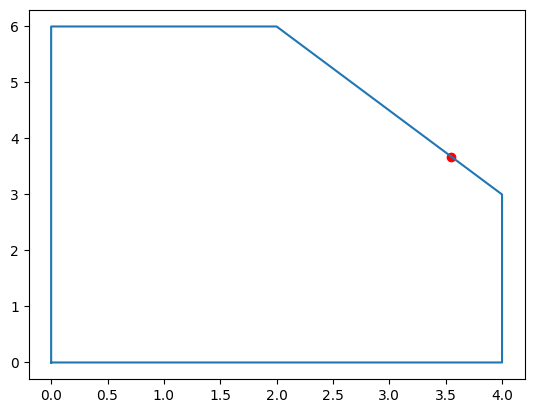

In [ ]:
coord = [[0,0], [4,0], [4,3], [2,6], [0,6]]
coord.append(coord[0]) #repeat the first point to create a 'closed loop'

xs, ys = zip(*coord) #create lists of x and y values
plt.figure()
plt.plot(xs,ys) 
plt.scatter(hof[0][0], hof[0][1], color='red')  # melhor
plt.show() # if you need...

## Questão 3

In [ ]:
# dados de entrada
x = np.array([-5.0, 2, 10])
y = np.array([10, 1, 5])

In [ ]:
# função objetivo
def objective_function(individual):
  obj = 0
  for i in range(len(x)):
    obj += np.sqrt((x[i]-individual[0])**2 + (y[i]-individual[1])**2)
  return obj,

def feasible(individual):
  for i in range(len(x)):
    if (x[i]-individual[0])**2 + (y[i]-individual[1])**2 > 100:
      return False
  return True

In [ ]:
# Tipos da fitness e indivíduos
creator.create('FitnessMin', base.Fitness, weights=(-1.0,))
creator.create('Individual', list, fitness=creator.FitnessMin)

/usr/local/lib/python3.9/dist-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [ ]:
toolbox = base.Toolbox()

# gerador da variável de decisão
toolbox.register('attr_real1', random.uniform, -5, 10)
toolbox.register('attr_real2', random.uniform, 1, 10)

# Inicializar individuo e população
toolbox.register('individual', tools.initCycle, creator.Individual, (toolbox.attr_real1, toolbox.attr_real2), 1)  

# População
toolbox.register('population', tools.initRepeat, list, toolbox.individual)

In [ ]:
# Operadores
toolbox.register('evaluate', objective_function)
toolbox.decorate("evaluate", tools.DeltaPenalty(feasible, sys.maxsize))
toolbox.register('mate', tools.cxBlend, alpha=0)
toolbox.register('mutate', tools.mutGaussian, mu=0, sigma=1, indpb=0.05)
toolbox.register('select', tools.selTournament, tournsize=3)

In [ ]:
pop = toolbox.population(n=100)
hof = tools.HallOfFame(1)  # melhor de todo o processo
stats = tools.Statistics(lambda ind:ind.fitness.values)
stats.register('avg', np.mean)
stats.register('std', np.std)
stats.register('min', np.min)
stats.register('max', np.max)

In [ ]:
pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.1, ngen=50, 
                                stats=stats, halloffame=hof, verbose=True)

gen	nevals	avg        	std        	min    	max        
0  	100   	6.54859e+18	4.18522e+18	20.1072	9.22337e+18
1  	64    	2.85925e+18	4.26575e+18	20.3085	9.22337e+18
2  	61    	1.84467e+17	1.29127e+18	20.3085	9.22337e+18
3  	45    	9.22337e+16	9.17714e+17	20.3085	9.22337e+18
4  	57    	20.5619    	0.199859   	20.2187	21.3792    
5  	61    	9.22337e+16	9.17714e+17	20.1606	9.22337e+18
6  	57    	20.3196    	0.0722075  	20.144 	20.4862    
7  	59    	20.2474    	0.0608026  	20.1134	20.3507    
8  	55    	1.84467e+17	1.29127e+18	20.1126	9.22337e+18
9  	58    	9.22337e+16	9.17714e+17	20.1088	9.22337e+18
10 	45    	20.1419    	0.0291419  	20.1065	20.3672    
11 	73    	4.61169e+17	2.01019e+18	20.1049	9.22337e+18
12 	55    	2.76701e+17	1.57339e+18	20.1038	9.22337e+18
13 	60    	4.61169e+17	2.01019e+18	20.102 	9.22337e+18
14 	53    	1.84467e+17	1.29127e+18	20.1015	9.22337e+18
15 	57    	4.61169e+17	2.01019e+18	20.1015	9.22337e+18
16 	58    	6.45636e+17	2.35332e+18	20.1014	9.22337e+18
17 	49    

In [ ]:
# Melhor solução
print('Melhor indivíduo:', hof[0])

Melhor indivíduo: [2.3459276207078483, 3.2150023671014094]


In [ ]:
# Resultado da fo do mlehor indivíduo:
print('Melhor F.O.:', objective_function(hof[0]))

Melhor F.O.: (20.101249986624083,)


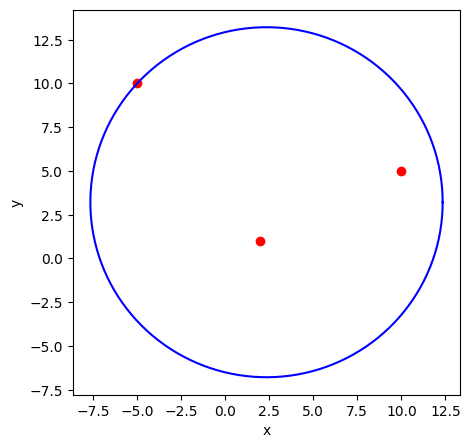

In [ ]:
theta = np.linspace(0, 2*np.pi, 150)
 
radius = 10
 
a = radius * np.cos( theta ) + hof[0][0]
b = radius * np.sin( theta ) + hof[0][1]

plt.figure(figsize=(5,5))
plt.plot(a, b, color='blue')
plt.scatter(x, y, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()